In [16]:
from google.colab import drive # Mount Google Drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/all_data_set.csv') # Read data set
df.head() # Print first 5 rows to get a feel for data set

# Somehow I did not understand what the Google colab was when I read the task description the first time and started with setting up pandas and jupyter lab locally. It took several hours. Lesson learned to read and understand everything before starting :)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,r_application_id,app_date,amount,original_amount,term,original_term,commission_charged,gender,dob,email,...,provider_5_device_os,provider_5_device_screen,provider_5_device_type,provider_5_rule_zero,provider_5_rule_one,provider_5_rule_two,provider_5_rule_three,credit_limit,new_income,new_liabilities
0,233991,2018-03-26 13:11:58,1000.0,1000.0,30,30,250,0,1988-10-25,test@wp.pl,...,WINDOWS NT 6.1,1024X1280,WINDOWS,NaN,NaN,NaN,NaN,1000.0,2200.0,200.0
1,234008,2018-03-26 13:26:38,1500.0,2500.0,30,30,375,0,1975-11-22,test@wp.pl,...,WINDOWS NT 10.0,768X1366,WINDOWS,NaN,NaN,NaN,NaN,1500.0,5800.0,600.0
2,234010,2018-03-26 13:27:51,300.0,1000.0,30,30,75,1,1995-04-04,test@gmail.com,...,WINDOWS NT 6.1,1080X1920,WINDOWS,NaN,NaN,NaN,NaN,300.0,2350.0,300.0
3,234155,2018-03-26 15:47:22,1500.0,2500.0,30,30,375,1,1983-12-12,test@vp.pl,...,ANDROID 6.0.1,640X360,ANDROID,NaN,NaN,NaN,NaN,1500.0,2600.0,1000.0
4,234006,2018-03-26 13:24:59,400.0,400.0,30,30,100,1,1992-03-10,test@onet.pl,...,ANDROID 7.0,640X360,ANDROID,NaN,NaN,NaN,NaN,1000.0,2100.0,300.0


# New Section

In [7]:
df.info() # explore 83 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 84 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   r_application_id                          10000 non-null  int64  
 1   app_date                                  10000 non-null  object 
 2   amount                                    10000 non-null  float64
 3   original_amount                           10000 non-null  float64
 4   term                                      10000 non-null  int64  
 5   original_term                             10000 non-null  int64  
 6   commission_charged                        10000 non-null  int64  
 7   gender                                    10000 non-null  int64  
 8   dob                                       10000 non-null  object 
 9   email                                     10000 non-null  object 
 10  employment_status                  

In [10]:
df.groupby('fpd30').fpd30.count() # check how many loans defaulted out of 10 000

fpd30
0    8206
1    1794
Name: fpd30, dtype: int64

In [13]:
# start playing around with some features/columns to see if there are correlations between them and fdp30
# 1. correlation: see if pensioners really are the safest clients as I have read years ago

# Group by 'employment_status' and calculate both total and defaulted loans simultaneously
counts = df.groupby('employment_status').agg(
    Total_Loans=('fpd30', 'count'),
    Defaulted_Loans=('fpd30', lambda x: (x==1).sum())
)

# Calculate % of defaulted loans and round it
counts['% Defaulted Loans'] = ((counts['Defaulted_Loans'] / counts['Total_Loans']) * 100).round()

# Sort by '% Defaulted Loans' in descending order to have the highest percentage first
counts = counts.sort_values('% Defaulted Loans', ascending=False)

# Display DataFrame
counts


,Total_Loans,Defaulted_Loans,% Defaulted Loans
employment_status,,,
Social status,257,53,21.0
Employed,8010,1485,19.0
Individual entrepreneur,84,16,19.0
Self employed,1269,201,16.0
Pensioner,380,39,10.0


In [42]:
# 2. correlation: by age

# Convert 'dob' to datetime, calculate 'age' assuming all loans were issued in 2018 (first 5 rows 'app_date') which is probably not true, but for this purposse I hope no big deal
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = 2018 - df['dob'].dt.year

# Group by 'age' and calculate both total and defaulted loans simultaneously
age_counts = df.groupby('Age').agg(
    Total_Loans=('fpd30', 'count'),
    Defaulted_Loans=('fpd30', lambda x: (x == 1).sum())
)

# Calculate the % of defaulted loans and round the %
age_counts['% Defaulted Loans'] = ((age_counts['Defaulted_Loans'] / age_counts['Total_Loans']) * 100).round(2)

# Sort by '% Defaulted Loans' in descending order
age_counts = age_counts.sort_values('% Defaulted Loans', ascending=False)

age_counts

# Why is age 55 so high? In practice what to do with such outlier? Statistical analyses or don't use it?
# Age range is 20...71, could real ages be 18...69?


,Total_Loans,Defaulted_Loans,% Defaulted Loans
Age,,,
21,226,85,37.61
20,55,18,32.73
22,285,78,27.37
23,326,80,24.54
25,372,89,23.92
55,77,18,23.38
27,442,101,22.85
28,459,103,22.44
24,373,80,21.45


In [22]:
# 3. correlation: gender
# Group by 'gender' and calculate both total and defaulted loans simultaneously
gender_counts = df.groupby('gender').agg(
    Total_Loans=('fpd30', 'count'),
    Defaulted_Loans=('fpd30', lambda x: (x == 1).sum())
)

# Calculate the % of defaulted loans and round the %
gender_counts['% Defaulted Loans'] = ((gender_counts['Defaulted_Loans'] / gender_counts['Total_Loans']) * 100).round()

gender_counts

# Why not show genders? Is Gender 1 a male?

,Total_Loans,Defaulted_Loans,% Defaulted Loans
gender,,,
0,4488,675,15.0
1,5512,1119,20.0


In [25]:
# 4. correlation: 'original_amount' - I assume it is amount user requested but not necessaraly received
# Group by 'original_amount' and calculate both total and defaulted loans simultaneously
loan_counts = df.groupby('original_amount').agg(
    Total_Loans=('fpd30', 'count'),
    Defaulted_Loans=('fpd30', lambda x: (x==1).sum())
)

# Calculate the % of defaulted loans and round the %
loan_counts['% Defaulted Loans'] = ((loan_counts['Defaulted_Loans'] / loan_counts['Total_Loans']) * 100).round()

# Sort by 'Total_Loans'
loan_counts_sorted = loan_counts.sort_values('Total_Loans', ascending=False)

loan_counts_sorted


,Total_Loans,Defaulted_Loans,% Defaulted Loans
original_amount,,,
2500.0,2262,398,18.0
1500.0,1652,303,18.0
300.0,1597,326,20.0
1000.0,1312,263,20.0
500.0,647,82,13.0
2000.0,496,80,16.0
600.0,406,51,13.0
400.0,323,46,14.0
700.0,218,33,15.0


<ipython-input-105-fae447c883a1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(loan_counts_sorted_by_amount.index.astype(str), rotation=45)


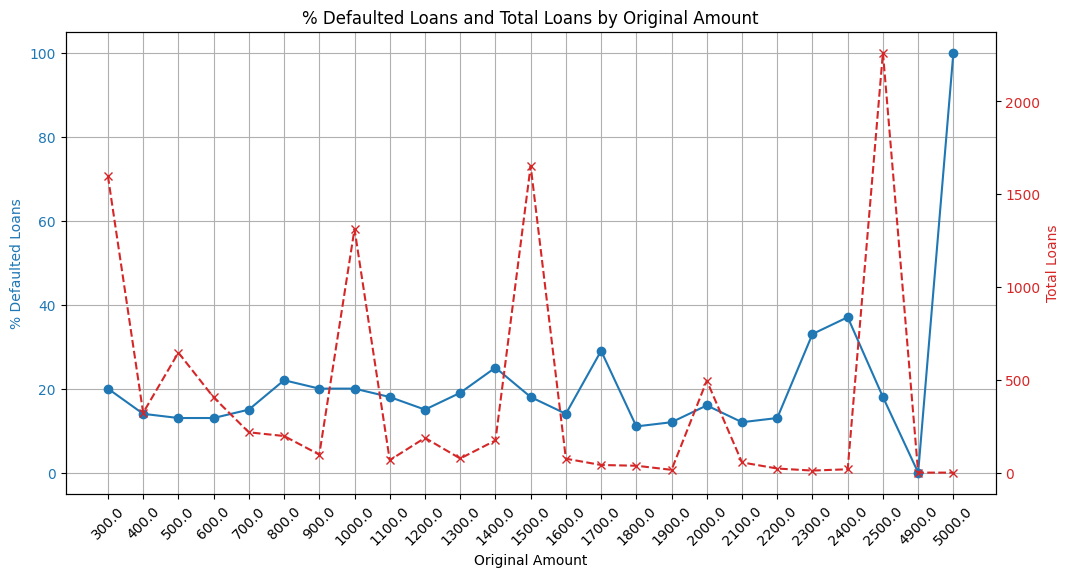

In [105]:
# Cannot se anything interesting in the table, lets see the graph if original amount correlates with fpd30

# Create the figure and the first axis (ax1) for the % of defaulted loans
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Original Amount')
ax1.set_ylabel('% Defaulted Loans', color=color)
# Ensure we're using the DataFrame sorted by 'original_amount'
ax1.plot(loan_counts_sorted_by_amount.index.astype(str), loan_counts_sorted_by_amount['% Defaulted Loans'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(loan_counts_sorted_by_amount.index.astype(str), rotation=45)
ax1.grid(True)

# Create the second axis (ax2) for the total loans, sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Loans', color=color)
# Plotting total loans using the same DataFrame sorted by 'original_amount'
ax2.plot(loan_counts_sorted_by_amount.index.astype(str), loan_counts_sorted_by_amount['Total_Loans'], marker='x', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title of the chart
plt.title('% Defaulted Loans and Total Loans by Original Amount')

# Show the plot
plt.show()

# Looks like no correlation

In [37]:
#  5. correlation to see if mobile users are more risky than desktop/laptop users

device_type_counts = df.groupby('provider_5_device_type').agg(
    Total_Loans=('fpd30', 'count'),
    Defaulted_Loans=('fpd30', lambda x: (x == 1).sum())
)
device_type_counts['% Defaulted Loans'] = ((device_type_counts['Defaulted_Loans'] / device_type_counts['Total_Loans']) * 100).round(2)

device_type_counts = device_type_counts.sort_values('provider_5_device_type')

device_type_counts

# Yes, they are (were ir 2018)

,Total_Loans,Defaulted_Loans,% Defaulted Loans
provider_5_device_type,,,
ANDROID,3531,848,24.02
BLACKBERRY,3,0,0.00
CHROMEOS,3,1,33.33
IPAD,34,5,14.71
IPHONE,358,64,17.88
LINUX,42,8,19.05
MAC,144,18,12.50
PLAYSTATION,2,0,0.00
WINDOWS,5572,765,13.73


In [62]:
# 6. correlation: if risk goes up by number of rejected loan application

counts = df.groupby('rejected_applications').agg(
    Total_Loans=('fpd30', 'count'),
    Defaulted_Loans=('fpd30', lambda x: (x==1).sum())
)

counts['% Defaulted Loans'] = ((counts['Defaulted_Loans'] / counts['Total_Loans']) * 100).round()

counts = counts.sort_values('Total_Loans', ascending=False)

counts

,Total_Loans,Defaulted_Loans,% Defaulted Loans
rejected_applications,,,
0.0,7745,1242,16.0
1.0,1403,305,22.0
2.0,443,111,25.0
3.0,169,54,32.0
4.0,93,31,33.0
5.0,65,21,32.0
6.0,32,11,34.0
7.0,15,4,27.0
9.0,12,6,50.0


In [67]:
# 7. correlation: see if 'term' correlates

counts = df.groupby('term').agg(
    Total_Loans=('fpd30', 'count'),
    Defaulted_Loans=('fpd30', lambda x: (x==1).sum())
)

counts['% Defaulted Loans'] = ((counts['Defaulted_Loans'] / counts['Total_Loans']) * 100).round()

counts = counts.sort_values('term', ascending=True)

counts

# It does, I guess the term is measured in years

,Total_Loans,Defaulted_Loans,% Defaulted Loans
term,,,
10.0,185,11,6.0
20.0,176,17,10.0
30.0,9639,1766,18.0


In [73]:
# 8. correlation for amount

counts = df.groupby('amount').agg(
    Total_Loans=('fpd30', 'count'),
    Defaulted_Loans=('fpd30', lambda x: (x==1).sum())
)

counts['% Defaulted Loans'] = ((counts['Defaulted_Loans'] / counts['Total_Loans']) * 100).round()

counts = counts.sort_values('% Defaulted Loans', ascending=False)

counts

# Seems like there is not correlation but amounts are too small for the 'term' to be years.

,Total_Loans,Defaulted_Loans,% Defaulted Loans
amount,,,
2300.0,7,2,29.0
2100.0,36,10,28.0
1600.0,22,6,27.0
300.0,2192,478,22.0
1000.0,1969,413,21.0
1900.0,14,3,21.0
1400.0,270,58,21.0
900.0,128,26,20.0
800.0,189,35,19.0


In [108]:
# Now, lets handle missing values

from sklearn.impute import SimpleImputer

numerical_features = ['term', 'rejected_applications']

categorical_features = ['gender', 'employment_status', 'provider_5_device_type'] # Probably 'ignore_communication' doesn't need imputation because it is boolean

# Numerical imputation - replace NaN with median values
num_imputer = SimpleImputer(strategy='median')
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

# Categorical imputation - replace NaN with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# Better use 'age' derived from 'dob' than handling 'dob' directly - there are 10 000 non-null 'dob' values, but in case:
df['dob'] = pd.to_datetime(df['dob']) #Convert 'dob' to datetime format
df['age'] = 2018 - df['dob'].dt.year # Calculate 'age' Assuming all loans were issued in 2018 and add 'age' featute to DataFrame
age_imputer = SimpleImputer(strategy='median')
df['age'] = age_imputer.fit_transform(df[['age']])




In [109]:
# Check if all target features values are non-zero/NaN

print(df[numerical_features].isnull().sum())
print(df[categorical_features].isnull().sum())
print(df['age'].isnull().sum())


term                     0
rejected_applications    0
dtype: int64
gender                    0
employment_status         0
provider_5_device_type    0
dtype: int64
0


In [110]:
# Visually inspect the data to ensure the imputation looks correct
df[['age'] + numerical_features + categorical_features].head()

,age,term,rejected_applications,gender,employment_status,provider_5_device_type
0,30.0,30.0,3.0,0,Employed,WINDOWS
1,43.0,30.0,0.0,0,Self employed,WINDOWS
2,23.0,30.0,0.0,1,Employed,WINDOWS
3,35.0,30.0,0.0,1,Employed,ANDROID
4,26.0,30.0,0.0,1,Employed,ANDROID


In [111]:

# Apply one-hot encoding since these features are nominal with no inherent order (for which ordinal encoding would be used)
df_encoded = pd.get_dummies(df, columns=['employment_status', 'provider_5_device_type'], drop_first=True)

# The pd.get_dummies() function automatically:
  # Converts each category value into a new binary column like employment_status_Social status, employment_status_Employed, and so on
  # Appends these new columns to the original DataFrame.
  # Drops the original columns that were encoded.

# Since 'gender' is already binary (0 or 1), encoding it will create two columns ('gender_0' and 'gender_1'), which are redundant for a binary variable.


In [112]:
# Splitting the data

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('fpd30', axis=1)  # Drop the target variable to isolate features
y = df['fpd30']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


In [113]:
# Data set splitting

from sklearn.model_selection import train_test_split

# Selecting the target features, including newly created dummy variables for the categorical features
encoded_features = [col for col in df_encoded.columns if col.startswith(('employment_status_', 'provider_5_device_type_'))]
selected_features = ['term', 'rejected_applications', 'age', 'gender'] + encoded_features

# Prepare the feature matrix (X) and target vector (y)
X = df_encoded[selected_features]
y = df_encoded['fpd30']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11) # 80% data points for training, 20% for validation/testing


In [114]:
#Model training

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=22)
# This part I don't realy understand yet about overfitting and underfitting. Just that n_estimators is number of boosting stages (trees) and the more trees there are, less data points are in each
# tree which then leads to poor prediction performance. Also max_depth increases number of trees and risks overfitting but can model more complex relationships.

#  Learning_rate says how much each tree contributes to final outcome. Smaller rate needs more trees.

# Random state here and in data splitting fixes randomness making results consistent across multiple runs

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# On first run accuracy is 0.8295 - I guess not too bad.

Test accuracy: 0.8305


In [115]:
# FInd a threshold for approval rate of 20%.

from sklearn.metrics import precision_recall_curve
import numpy as np

# Step 1: Generate predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of 'fpd30' being 1 (default)

# Step 2: Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Function to find the threshold for a given approval rate
def find_threshold_for_approval_rate(y_probs, approval_rate=0.20):
    # Sort probabilities to identify the cut-off for the desired approval rate
    sorted_probs = np.sort(y_probs)
    # Calculate the index for the cut-off
    cutoff_index = int((1-approval_rate) * len(sorted_probs))
    # Find the threshold that corresponds to the desired approval rate
    threshold = sorted_probs[cutoff_index]
    return threshold

# Step 3: Find the threshold for a 20% approval rate
threshold_20_percent = find_threshold_for_approval_rate(y_probs, approval_rate=0.20)
print(f"Threshold for 20% approval rate: {threshold_20_percent:.4f}")

# I get result: Threshold for 20% approval rate: 0.2538
# Meaning that the model has ranked all loan application from safest (default risk 0) to riskiest (default risk 1) and for loan application to be within safest 20%
# the possibility of default for this particular model has to be under 0.2538

Threshold for 20% approval rate: 0.2427


In [116]:
# Run model 10 times to assess its consistensy and stability

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import numpy as np

n_runs = 10  # Number of iterations
precision_scores = []  # To store precision scores from each run

for run in range(n_runs):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=run) # 'run' is the iteration number - to ensure that each train-test split is different from the others

    # Initialize the GradientBoostingClassifier model
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate precision and add it to the list
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

    print(f"Run {run + 1}: Precision = {precision:.4f}")

# Calculate mean and standard deviation of precision scores
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)

print(f"Average Precision: {mean_precision:.4f}")
print(f"Precision Standard Deviation: {std_precision:.4f}")

# I don't exactly understand why results are so much worse. The first single run got lucky?

Run 1: Precision = 0.2500
Run 2: Precision = 0.2000
Run 3: Precision = 0.4000
Run 4: Precision = 0.3333
Run 5: Precision = 0.5556
Run 6: Precision = 0.3750
Run 7: Precision = 0.0000
Run 8: Precision = 0.2941
Run 9: Precision = 0.3000
Run 10: Precision = 0.5000
Average Precision: 0.3208
Precision Standard Deviation: 0.1484


In [117]:
# Lets try changing random states to get bit better results, but I know this is not the way to improve a model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import numpy as np

n_runs = 10  # Number of iterations
precision_scores = []  # To store precision scores from each run

for run in range(n_runs):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=run)

    # Initialize the GradientBoostingClassifier model
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state=1)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate precision and add it to the list
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

    print(f"Run {run + 1}: Precision = {precision:.4f}")

# Calculate mean and standard deviation of precision scores
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)

print(f"Average Precision: {mean_precision:.4f}")
print(f"Precision Standard Deviation: {std_precision:.4f}")

Run 1: Precision = 0.3000
Run 2: Precision = 0.4167
Run 3: Precision = 0.3929
Run 4: Precision = 0.4091
Run 5: Precision = 0.4500
Run 6: Precision = 0.3125
Run 7: Precision = 0.3810
Run 8: Precision = 0.3846
Run 9: Precision = 0.3421
Run 10: Precision = 0.3182
Average Precision: 0.3707
Precision Standard Deviation: 0.0476
